In [51]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import re


os.chdir("C:/Users/user/DT구현")
#출처 호주 멜버른 대학교 comp30027-07-Decision Tree

In [2]:
data = pd.read_excel("play.xlsx")
data

,id,Outlook,Temp,Humidity,Windy,Play
0,a,sunny,hot,high,False,no
1,b,sunny,hot,high,True,no
2,c,overcast,hot,high,False,yes
3,d,rainy,mild,high,False,yes
4,e,rainy,cool,normal,False,yes
5,f,rainy,cool,normal,True,no
6,g,overcast,cool,normal,True,yes
7,h,sunny,mild,high,False,no
8,i,sunny,cool,normal,False,yes
9,j,rainy,mild,normal,False,yes


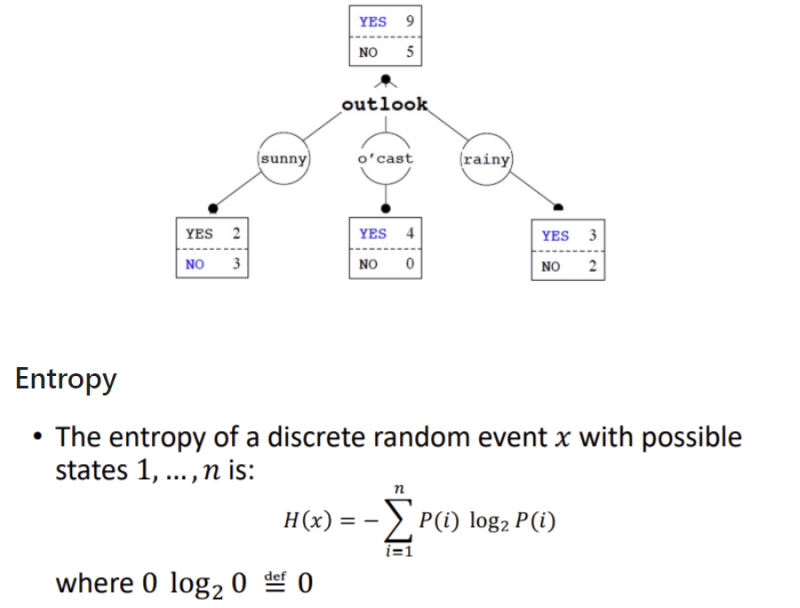

### One R
$$ P(Play = yes|Outlook = sunny) = \frac{P(Play = yes \cap Outlook = sunny)}{P(Outlook = sunny)}$$

In [3]:
# Example of Outlook & Sunny
# yes+ no = P(Outlook = sunny)
yes = data[(data['Outlook'] == "sunny") & (data['Play'] == "yes")].shape[0]
no = data[(data["Outlook"] == "sunny") & (data["Play"] == "no")].shape[0]

In [4]:
# General Function
def get_label_n(x_value,label,y_value,label_y):
    res = data[(data[x_value] == label) & (data[y_value] == label_y)].shape[0]
    return res
    

In [5]:
out_look_sunny_yes = get_label_n("Outlook","sunny","Play","yes")
out_look_sunny_no = get_label_n("Outlook","sunny","Play","no")
out_look_overcast_yes = get_label_n("Outlook","overcast","Play","yes")
out_look_overcast_no = get_label_n("Outlook","overcast","Play","no")
out_look_rainy_yes = get_label_n("Outlook","rainy","Play","yes")
out_look_rainy_no = get_label_n("Outlook","rainy","Play","no")

In [6]:
temp_hot_yes = get_label_n("Temp", "hot", "Play", "yes")
temp_hot_no = get_label_n("Temp", "hot", "Play", "no")
temp_mild_yes = get_label_n("Temp", "mild", "Play", "yes")
temp_mild_no = get_label_n("Temp", "mild", "Play", "no")
temp_cool_yes = get_label_n("Temp", "cool", "Play", "yes")
temp_cool_no = get_label_n("Temp", "cool", "Play", "no")

In [7]:
def get_error_rate(A,B):
    if A >= B:
        error= B 
    else:
        error = A

    return(error/ len(data))

In [8]:
temp_hot_yes = get_label_n("Temp", "hot", "Play", "yes")
temp_hot_no = get_label_n("Temp", "hot", "Play", "no")
temp_mild_yes = get_label_n("Temp", "mild", "Play", "yes")
temp_mild_no = get_label_n("Temp", "mild", "Play", "no")
temp_cool_yes = get_label_n("Temp", "cool", "Play", "yes")
temp_cool_no = get_label_n("Temp", "cool", "Play", "no")

In [9]:
out_look_error_rate = \
get_error_rate(out_look_sunny_yes,out_look_sunny_no) + \
get_error_rate(out_look_overcast_yes,out_look_overcast_no) + \
get_error_rate(out_look_rainy_yes,out_look_rainy_no)

out_look_error_rate

0.2857142857142857

In [10]:
temp_error_rate = \
get_error_rate(temp_hot_yes,temp_hot_no) + \
get_error_rate(temp_mild_yes,temp_mild_no) + \
get_error_rate(temp_cool_yes,temp_cool_no)

temp_error_rate

0.3571428571428571

In [11]:
val_list = data.columns[1:5]
val_list

Index(['Outlook', 'Temp', 'Humidity', 'Windy'], dtype='object')

In [12]:
error_rate_list = []
for i in val_list:

    val_category_list = data[i].unique()

    error_rate = 0
    for j in val_category_list:
        yes = get_label_n(i, j, "Play", "yes")
        no = get_label_n(i, j, "Play", "no")

        error_rate += get_error_rate(yes, no)
    error_rate_list.append(error_rate)
    
error_rate_list

[0.2857142857142857,
 0.3571428571428571,
 0.2857142857142857,
 0.3571428571428571]

In [13]:
# Error Rate가 작은거
val_list[np.argmin(error_rate_list)]

'Outlook'

In [14]:
yes_rate = get_label_n("Outlook", "sunny", "Play", "yes") / (get_label_n("Outlook", "sunny", "Play", "yes") + get_label_n("Outlook", "sunny", "Play", "no"))
no_rate = get_label_n("Outlook", "sunny", "Play", "no") / (get_label_n("Outlook", "sunny", "Play", "yes") + get_label_n("Outlook", "sunny", "Play", "no"))



In [15]:
# Entropy
def H(i):
    val_category_list = data[i].unique()
    h = []
    H=0
    for j in val_category_list:

        yes_rate = get_label_n(i, j, "Play", "yes") / (get_label_n(i, j, "Play", "yes") + get_label_n(i, j, "Play", "no"))
        no_rate = get_label_n(i, j, "Play", "no") / (get_label_n(i, j, "Play", "yes") + get_label_n(i, j, "Play", "no"))

        if yes_rate == 0:
            log2_yes_rate = 0
        else:
            log2_yes_rate = np.log2(yes_rate) 

        if no_rate == 0:
            log2_no_rate = 0
        else:
            log2_no_rate = np.log2(no_rate)  

        H = yes_rate* log2_yes_rate + no_rate*log2_no_rate
        h.append(-H)

    return h

In [16]:
H("Temp")

[1.0, 0.9182958340544896, 0.8112781244591328]

In [17]:
H("Humidity")

[0.9852281360342515, 0.5916727785823275]

In [18]:
H("Windy")

[0.8112781244591328, 1.0]

#### Mean Information
weighted average of the entropy
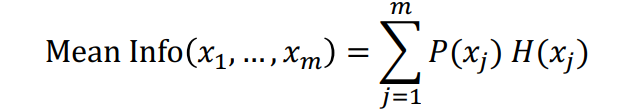

In [19]:
def meaninfo(i):
    val_category_list = data[i].unique()
    h = []
    p = []
    H=0
    for j in val_category_list:

        yes_rate = get_label_n(i, j, "Play", "yes") / (get_label_n(i, j, "Play", "yes") + get_label_n(i, j, "Play", "no"))
        no_rate = get_label_n(i, j, "Play", "no") / (get_label_n(i, j, "Play", "yes") + get_label_n(i, j, "Play", "no"))

        if yes_rate == 0:
            log2_yes_rate = 0
        else:
            log2_yes_rate = np.log2(yes_rate) 

        if no_rate == 0:
            log2_no_rate = 0
        else:
            log2_no_rate = np.log2(no_rate)  

        H = yes_rate* log2_yes_rate + no_rate*log2_no_rate
        h.append(-H)
        p.append(sum(data[i] == j) / len(data[i]))
    return np.sum(np.array(h) * np.array(p))

In [20]:
meaninfo("Outlook")

0.6935361388961918

In [21]:
meaninfo("Windy")

0.8921589282623617

In [22]:
meaninfo("Temp")

0.9110633930116763

In [23]:
meaninfo("Humidity")

0.7884504573082896

In [24]:
meaninfo("Play")

0.0

In [35]:
p_yes_play = sum(data['Play'] == "yes")/len(data)
p_no_play = sum(data['Play'] == "no")/len(data)

In [36]:
if p_yes_play == 0:
    log2_p_yes_play = 0
else:
    log2_p_yes_play = np.log2(p_yes_play) 

if p_no_play == 0:
    log2_p_no_play = 0
else:
    log2_p_no_play = np.log2(p_no_play)  
H_play = -(p_yes_play * log2_p_yes_play + p_no_play * log2_p_no_play)
H_play

0.9402859586706311

In [37]:
H_play - meaninfo("Outlook")

0.24674981977443933

#### Information Gain
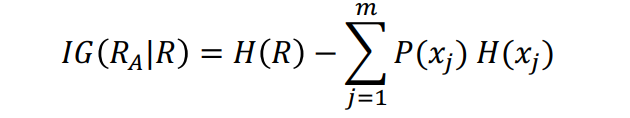

In [38]:
def info_gain(k,up_H):
    IG = up_H - meaninfo(k)
    return IG

In [39]:
info_gain("Outlook",H_play)

0.24674981977443933

In [42]:
info_gain("Temp",H_play)

0.02922256565895487

In [43]:
info_gain("Humidity",H_play)

0.15183550136234159

In [44]:
info_gain("Windy",H_play)

0.04812703040826949

In [45]:
def split_info(target,value):
    targlist = data[target].unique()
    vallist = data[value].unique()
    
    tmp = []
    mean_info_prob_cnt = []
    for i in vallist:
        sub_data = data[data[value] == i]
        tmp_list = []
        for j in targlist:
            a = estimate_targ_cnt(subdata,target,j)
            tmp_list.append(a)
        
        mean_info_prob_cnt.append(sum(tmp_list))
        
    one = np.array(mean_info_prob_cnt) / np.sum(mean_info_prob_cnt)
    two = log2(one)
    two = np.where(two == -math.inf, 0, two)
    two = two.reshape(len(one),1)
    return -(one @ two)[0]

#### Gain Ratio 
reduces the bias for information gain towrads highly-branching attribues by normalising relative to the split info
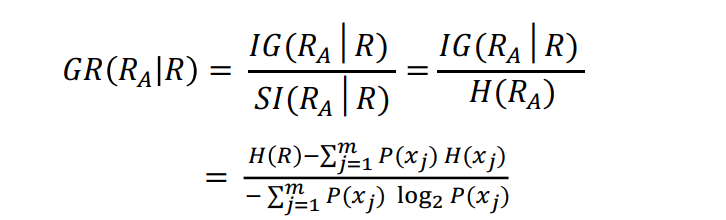

In [49]:
def gain_ratio(data,target,value):
    return info_gain(data,target,value) / split_info(target,value)